In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [51]:
wine = pd.read_csv('WineQT.csv')


In [52]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [53]:
wine.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [54]:
wine.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [55]:
bins=(2,6.5,8)
group_name=['bad','good']
wine['quality']=pd.cut(wine['quality'],bins=bins,labels=group_name)
wine['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [56]:
label_quality = LabelEncoder()

In [57]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [58]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,4


In [59]:
wine['quality'].value_counts()

quality
0    984
1    159
Name: count, dtype: int64

<Axes: ylabel='count'>

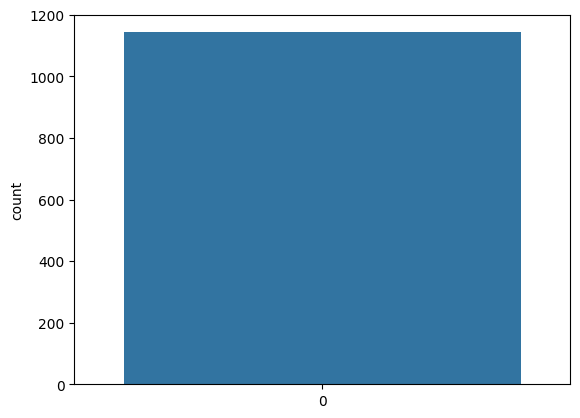

In [60]:
sns.countplot(wine['quality'])

In [61]:
X=wine.drop('quality',axis=1)
Y=wine['quality']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [63]:
sc = StandardScaler()

In [64]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [65]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [66]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       201
           1       0.64      0.32      0.43        28

    accuracy                           0.90       229
   macro avg       0.78      0.65      0.69       229
weighted avg       0.88      0.90      0.88       229



In [67]:
print(confusion_matrix(y_test, pred_rfc))

[[196   5]
 [ 19   9]]


In [68]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)

cm

0.8951965065502183

In [69]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,0,10


In [70]:
Xnew = [[7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,6]]
ynew = rfc.predict(Xnew)

In [71]:
print('The quality of wine with given parameters is:') 
print(ynew)

The quality of wine with given parameters is:
[0]


In [74]:
clf=svm.SVC()
clf.fit(X_train,y_train)
pred_clf=clf.predict(X_test)

In [75]:
print(classification_report(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       201
           1       0.64      0.25      0.36        28

    accuracy                           0.89       229
   macro avg       0.77      0.62      0.65       229
weighted avg       0.87      0.89      0.87       229

[[197   4]
 [ 21   7]]


In [81]:
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(X_train,y_train)
pred_mloc=mlpc.predict(X_test)


c:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [82]:


print(classification_report(y_test,pred_mloc))
print(confusion_matrix(y_test,pred_mloc))

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       201
           1       0.42      0.46      0.44        28

    accuracy                           0.86       229
   macro avg       0.67      0.69      0.68       229
weighted avg       0.86      0.86      0.86       229

[[183  18]
 [ 15  13]]


In [83]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_mloc)

cm

0.8558951965065502